# ABD NÜFUS SAYIMI VERİ KÜMESİNDEN GELİR TAHMİNİ

ABD nufüs sayım bürosu tarafından toplanmış 2015 yılına ait verilerdir. Verinin içerisinde 37 sütun, 74 000 satır mevcuttur. Verinin öznitelikleri; eyalet bilgisi, ilçe, toplam nüfus, erkek sayı, kadın sayı, koyu esmer, beyaz, siyahi, yerli, asya, pasifik, vatandaş sayısı, hanehalki geliri, kişi başına düşen gelir, yoksulluk seviyesi, iş sektör bilgisi, çalışma/ çalışmama durumu gibi bilgiler bulunmaktadır. 

Bu veri üzerinde çalışma amacı ise;
Devlet (sınıflandırma) veya hane halkı geliri (regresyon) gibi şeyleri tahmin edebilir miyiz? Verilerde ne tür kümeler bulabiliriz?  gibi sorulardır. 


-----------------------------------------------------------------------------------------------------------------------------------------
# **İçindekiler**
## 1- Kullanılacak kütüphanelerin projeye dahil edilmesi
## 2- Veri kümesinin yüklenmesi (Colab için)
### 2.1- Veri kümesinin boyutu
## 3- Veri Ön İşleme
### 3.1 - Eksik verilerin ve index değerlerinin temizlenmesi
### 3.2 - Dönüşüm işlemlerinin gerçekleştirilmesi
### 3.3 - Verinin kullanılma ihtimaline karşın yüzdelik dilimlere dönüştürülmesi
### 3.4 - En fazla nüfusa sahip 4 şehrin farklı veri setine ayrılması
#### 3.4.1 - En fazla nüfusa sahip 4 şehrin ırklara göre gruplandırılması
#### 3.4.2 - En fazla nüfusa sahip 4 şehrin cinsiyete göre gruplandırılması
#### 3.4.4 - En fazla nüfusa sahip 4 şehrin gelire göre gruplandırılması
### 3.5 - Korelasyon Analizi
## 4 - Veri Kümesinin Görselleştirilmesi
### 4.1 - Irklara göre nufus dağılımı
### 4.2 - Toplam nüfusa göre 4 büyük şehirde çalışma sektörü dağılımı
### 4.3 -  Toplam nüfusa göre 4 büyük şehirde cinsiyet dağılımı
### 4.4 - Toplam nüfusa göre 4 büyük şehirde ırk dağılımı
### 4.5 - Cinsiyet ve ırka göre gelir dağılımı
### 4.6 - Sektörlere göre çocuk fakirliği dağılımı
### 4.7 - Çalışma durumuna göre dağılım
### 4.8 - Çalışma/ Çalışmama durumuna göre dağılım
## 5- Model Oluşturma
### 5.1 - Model için Ön Hazırlık
### 5.2 - Train ve Test setlerinin ayrılması
### 5.3 - Modellerin Kurulması  ve Tahmin- Confusion Matrix
#### 5.3.1 Logistic Regresyon
#### 5.3.2 – KNN
#### 5.3.3 - Decision Tree
#### 5.3.4 - Random Forest
#### 5.3.5 - Gradient Boosting
#### 5.3.6 – XgBoost
##### 5.3.6.1 XgBoost öznitelikleri önem sıralamasına göre grafiklendirmek
#### 5.3.7 – CatBoost
### 5.4 - Modellerin Değerlendirilmesi
#### 5.4.1 - Accuracy score değerleri
#### 5.4.2 - Model Başarısının Sınanması
#### 5.4.3 - Model Tahmin Başarısı Değerlendirmesi
## 6 - Sonuçların Görselleştirilmesi




-------------------------------------------------------------------------------------------------------------------------

##1- Kullanılacak kütüphanelerin projeye dahil edilmesi

In [0]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn import linear_model
import statsmodels.api as sm

from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from scipy.stats import randint as sp_randint
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

## 2- Veri kümesinin yüklenmesi (Colab için)

In [44]:

from google.colab import drive
drive.mount('/content/drive/') #mount drive ı colaba sanal disk olarak eklemektir. 
#mount işlemi bir kez yapılır. 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:
!pwd #mevcut dizinin öğrenilmesi

/content/drive/My Drive/project


In [43]:
%cd "/content/drive/My Drive/project" # verinin bulunduğu dizine ulaşmak

[Errno 2] No such file or directory: '/content/drive/My Drive/project # verinin bulunduğu dizine ulaşmak'
/content/drive/My Drive/project


In [0]:
!ls #dizindeki mevcut dosyaların görüntülenmesi

acs2015_census_tract_data.csv


In [0]:
acs2015_census = pd.read_csv("acs2015_census_tract_data.csv")  #Verinin yüklenmesi

### 2.1- Veri kümesinin boyutu

In [47]:
acs2015_census.shape 

(74001, 37)

## 3- Veri Ön İşleme




### 3.1 - Eksik verilerin ve index değerlerinin temizlenmesi

In [0]:
acs2015_census = acs2015_census.dropna()
acs2015_census = acs2015_census.reset_index(drop = True)

### 3.2 - Dönüşüm işlemlerinin gerçekleştirilmesi

In [0]:
percentages = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific','Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office','Construction','Production','Drive','Carpool','Transit','Walk','OtherTransp','WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']
for i in percentages:
    acs2015_census[i] = round(acs2015_census['TotalPop'] * acs2015_census[i] / 100) 

In [67]:
acs2015_census.head() # verinin genel görünümünün incelenmesi

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,M_share,F_share,Unemployment_Rate,White_Fraction,Black_Fraction,Asian_Fraction,Hispanic_Fraction,Native_Fraction,Pacific_Fraction,high_low_income
0,1001020100,Alabama,Autauga,1948,940,1008,18.0,1703.0,150.0,6.0,12.0,0.0,1503,61838,11900.0,25713.0,4548.0,158.0,164.0,676.0,331.0,415.0,232.0,296.0,1757.0,94.0,0.0,10.0,45.0,41.0,25.0,943,1502.0,356.0,90.0,0.0,105.0,0.482546,0.517454,0.053901,0.874230,0.077002,0.006160,0.009240,0.003080,0.006160,Mid
1,1001020200,Alabama,Autauga,2156,1059,1097,17.0,871.0,1149.0,0.0,50.0,0.0,1662,32303,13538.0,18021.0,2474.0,550.0,869.0,481.0,533.0,464.0,203.0,474.0,1861.0,282.0,0.0,0.0,15.0,0.0,23.4,753,1660.0,364.0,132.0,0.0,287.0,0.491187,0.508813,0.133117,0.403989,0.532931,0.023191,0.007885,0.000000,0.023191,Mid
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,2211.0,552.0,15.0,42.0,9.0,2335,44922,5629.0,20689.0,2817.0,377.0,585.0,932.0,739.0,656.0,273.0,368.0,2814.0,83.0,0.0,0.0,0.0,74.0,19.6,1373,1902.0,700.0,365.0,0.0,184.0,0.459569,0.540431,0.061995,0.744946,0.185984,0.014151,0.000000,0.005054,0.014151,Mid
3,1001020400,Alabama,Autauga,4423,2172,2251,464.0,3662.0,164.0,71.0,0.0,0.0,3306,54329,7003.0,24125.0,2870.0,93.0,71.0,1194.0,920.0,1194.0,385.0,725.0,3830.0,402.0,0.0,0.0,115.0,71.0,25.3,1782,3348.0,938.0,137.0,0.0,478.0,0.491069,0.508931,0.108071,0.827945,0.037079,0.000000,0.104906,0.016052,0.000000,Mid
4,1001020500,Alabama,Autauga,10763,4922,5841,75.0,7373.0,2669.0,0.0,409.0,0.0,7666,51965,6935.0,27526.0,2813.0,1227.0,1884.0,5338.0,1528.0,1959.0,226.0,1701.0,9471.0,1130.0,0.0,0.0,65.0,97.0,24.8,5037,7222.0,2971.0,570.0,0.0,452.0,0.457307,0.542693,0.041996,0.685032,0.247979,0.038001,0.006968,0.000000,0.038001,Mid


### 3.3 - Verinin kullanılma ihtimaline karşın yüzdelik dilimlere dönüştürülmesi

In [0]:
acs2015_census['M_share'] = acs2015_census.Men / acs2015_census.TotalPop 
acs2015_census['F_share'] = acs2015_census.Women / acs2015_census.TotalPop 
acs2015_census['Unemployment_Rate'] = acs2015_census.Unemployment / acs2015_census.TotalPop 
acs2015_census['White_Fraction'] = acs2015_census.White / acs2015_census.TotalPop
acs2015_census['Black_Fraction'] = acs2015_census.Black / acs2015_census.TotalPop
acs2015_census['Asian_Fraction'] = acs2015_census.Asian / acs2015_census.TotalPop
acs2015_census['Hispanic_Fraction'] = acs2015_census.Hispanic / acs2015_census.TotalPop
acs2015_census['Native_Fraction'] = acs2015_census.Native / acs2015_census.TotalPop
acs2015_census['Pacific_Fraction'] = acs2015_census.Asian / acs2015_census.TotalPop

In [0]:
acs2015_census.head() #eklenen yeni sütunları incelemek

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,M_share,F_share,Unemployment_Rate,White_Fraction,Black_Fraction,Asian_Fraction,Hispanic_Fraction,Native_Fraction,Pacific_Fraction
0,1001020100,Alabama,Autauga,1948,940,1008,18.0,1703.0,150.0,6.0,12.0,0.0,1503,61838.0,11900.0,25713.0,4548.0,158.0,164.0,676.0,331.0,415.0,232.0,296.0,1757.0,94.0,0.0,10.0,45.0,41.0,25.0,943,1502.0,356.0,90.0,0.0,105.0,0.482546,0.517454,0.053901,0.874230,0.077002,0.006160,0.009240,0.003080,0.006160
1,1001020200,Alabama,Autauga,2156,1059,1097,17.0,871.0,1149.0,0.0,50.0,0.0,1662,32303.0,13538.0,18021.0,2474.0,550.0,869.0,481.0,533.0,464.0,203.0,474.0,1861.0,282.0,0.0,0.0,15.0,0.0,23.4,753,1660.0,364.0,132.0,0.0,287.0,0.491187,0.508813,0.133117,0.403989,0.532931,0.023191,0.007885,0.000000,0.023191
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,2211.0,552.0,15.0,42.0,9.0,2335,44922.0,5629.0,20689.0,2817.0,377.0,585.0,932.0,739.0,656.0,273.0,368.0,2814.0,83.0,0.0,0.0,0.0,74.0,19.6,1373,1902.0,700.0,365.0,0.0,184.0,0.459569,0.540431,0.061995,0.744946,0.185984,0.014151,0.000000,0.005054,0.014151
3,1001020400,Alabama,Autauga,4423,2172,2251,464.0,3662.0,164.0,71.0,0.0,0.0,3306,54329.0,7003.0,24125.0,2870.0,93.0,71.0,1194.0,920.0,1194.0,385.0,725.0,3830.0,402.0,0.0,0.0,115.0,71.0,25.3,1782,3348.0,938.0,137.0,0.0,478.0,0.491069,0.508931,0.108071,0.827945,0.037079,0.000000,0.104906,0.016052,0.000000
4,1001020500,Alabama,Autauga,10763,4922,5841,75.0,7373.0,2669.0,0.0,409.0,0.0,7666,51965.0,6935.0,27526.0,2813.0,1227.0,1884.0,5338.0,1528.0,1959.0,226.0,1701.0,9471.0,1130.0,0.0,0.0,65.0,97.0,24.8,5037,7222.0,2971.0,570.0,0.0,452.0,0.457307,0.542693,0.041996,0.685032,0.247979,0.038001,0.006968,0.000000,0.038001


In [51]:
#en fazla nüfusa sahip 4 şehrin belirlenmesi
acs2015_census.groupby("State").TotalPop.sum()

State
Alabama                  4821879
Alaska                    729562
Arizona                  6531748
Arkansas                 2956316
California              38221472
Colorado                 5244194
Connecticut              3555917
Delaware                  924235
District of Columbia      634444
Florida                 19509409
Georgia                  9988480
Hawaii                   1404139
Idaho                    1616524
Illinois                12850493
Indiana                  6547728
Iowa                     3087394
Kansas                   2892983
Kentucky                 4386973
Louisiana                4623227
Maine                    1329100
Maryland                 5890432
Massachusetts            6680803
Michigan                 9855909
Minnesota                5415423
Mississippi              2983152
Missouri                 6041445
Montana                  1014088
Nebraska                 1861738
Nevada                   2778084
New Hampshire            1324201
New 

### 3.4 - En fazla nüfusa sahip 4 şehrin farklı veri setine ayrılması

In [0]:
state_top4 = acs2015_census[(acs2015_census['State'] == 'California') |
                            (acs2015_census['State'] == 'Florida') |
                            (acs2015_census['State'] == 'New York') | 
                            (acs2015_census['State'] == 'Texas')]

In [0]:
#Oluşturulan veri kümesine genel bakış
state_top4.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,M_share,F_share,Unemployment_Rate,White_Fraction,Black_Fraction,Asian_Fraction,Hispanic_Fraction,Native_Fraction,Pacific_Fraction
3499,6001400100,California,Alameda,2952,1454,1498,100.0,2087.0,106.0,0.0,466.0,0.0,2399,174113.0,37080.0,104852.0,16267.0,103.0,204.0,2252.0,115.0,428.0,53.0,100.0,1724.0,331.0,304.0,0.0,68.0,525.0,32.5,1522,2229.0,295.0,428.0,0.0,165.0,0.492547,0.507453,0.055894,0.706978,0.035908,0.157859,0.033875,0.000000,0.157859
3500,6001400200,California,Alameda,1984,938,1046,181.0,1446.0,30.0,0.0,159.0,0.0,1591,141806.0,12739.0,76930.0,8201.0,115.0,26.0,1460.0,157.0,250.0,79.0,36.0,923.0,73.0,522.0,121.0,91.0,254.0,25.4,1222,1456.0,264.0,254.0,10.0,44.0,0.472782,0.527218,0.022177,0.728831,0.015121,0.080141,0.091230,0.000000,0.080141
3501,6001400300,California,Alameda,5377,2362,3015,371.0,3339.0,694.0,11.0,726.0,0.0,4078,84598.0,15779.0,62892.0,13836.0,436.0,65.0,3549.0,645.0,742.0,75.0,366.0,2619.0,350.0,1237.0,350.0,247.0,575.0,29.5,3277,3979.0,1000.0,398.0,0.0,473.0,0.439278,0.560722,0.087967,0.620978,0.129068,0.135020,0.068998,0.002046,0.135020
3502,6001400400,California,Alameda,4105,1933,2172,374.0,2594.0,452.0,37.0,406.0,0.0,3417,102386.0,13037.0,53779.0,4346.0,304.0,0.0,3284.0,222.0,464.0,45.0,90.0,1375.0,410.0,1063.0,148.0,706.0,398.0,27.2,2614,2861.0,788.0,447.0,8.0,135.0,0.470889,0.529111,0.032887,0.631912,0.110110,0.098904,0.091108,0.009013,0.098904
3503,6001400500,California,Alameda,3651,1628,2023,518.0,1888.0,887.0,0.0,175.0,29.0,2841,76038.0,4925.0,38442.0,3325.0,464.0,0.0,2213.0,464.0,610.0,245.0,117.0,1628.0,194.0,811.0,139.0,332.0,551.0,28.6,2286,2906.0,431.0,314.0,0.0,237.0,0.445905,0.554095,0.064914,0.517119,0.242947,0.047932,0.141879,0.000000,0.047932


#### 3.4.1 - En fazla nüfusa sahip 4 şehrin ırklara göre gruplandırılması

In [0]:
state_totalpop = state_top4.groupby('State', as_index=False)[['TotalPop', 'Black', 'White', 'Hispanic', 'Asian']].sum()

In [0]:
state_totalpop

,State,TotalPop,Black,White,Hispanic,Asian
0,California,38221472,2127149.0,14798592.0,14692293.0,5176065.0
1,Florida,19509409,3024112.0,10910475.0,4643517.0,498115.0
2,New York,19562033,2808490.0,11110110.0,3603584.0,1550633.0
3,Texas,26456798,3053546.0,11594201.0,10179556.0,1106913.0


#### 3.4.2 - En fazla nüfusa sahip 4 şehrin cinsiyete göre gruplandırılması

In [0]:
state_sex = state_top4.groupby('State', as_index=False)[['TotalPop', 'Men', 'Women',]].sum()

In [0]:
state_sex

,State,TotalPop,Men,Women
0,California,38221472,18933999,19287473
1,Florida,19509409,9532674,9976735
2,New York,19562033,9472413,10089620
3,Texas,26456798,13118232,13338566


#### 3.4.3 - En fazla nüfusa sahip 4 şehrin çalışma sektörüne göre gruplandırılması

In [0]:
state_sector = state_top4.groupby('State', as_index=False)[['TotalPop', 'Professional', 'Service', 'Office', 'Construction', 'Production']].sum()

In [0]:
state_sector

,State,TotalPop,Professional,Service,Office,Construction,Production
0,California,38221472,13626153.0,7334907.0,9070001.0,3743659.0,4446289.0
1,Florida,19509409,6498286.0,4063862.0,5327694.0,1808032.0,1811588.0
2,New York,19562033,7393520.0,4132255.0,4678689.0,1446438.0,1911451.0
3,Texas,26456798,8881107.0,4834981.0,6424728.0,3026459.0,3289714.0


#### 3.4.4 - En fazla nüfusa sahip 4 şehrin gelire göre gruplandırılması

In [0]:
state_income = state_top4.groupby('State', as_index=False)[['Income', 'IncomePerCap', 'Poverty', 'ChildPoverty']].sum()

In [0]:
state_income

,State,Income,IncomePerCap,Poverty,ChildPoverty
0,California,533913107.0,247756090.0,6254135.0,7866438.0
1,Florida,208445728.0,115411750.0,3251654.0,4481538.0
2,New York,307650677.0,154500797.0,3082777.0,3927218.0
3,Texas,290395833.0,139919776.0,4593700.0,6302945.0


## 3.5 - Korelasyon Analizi

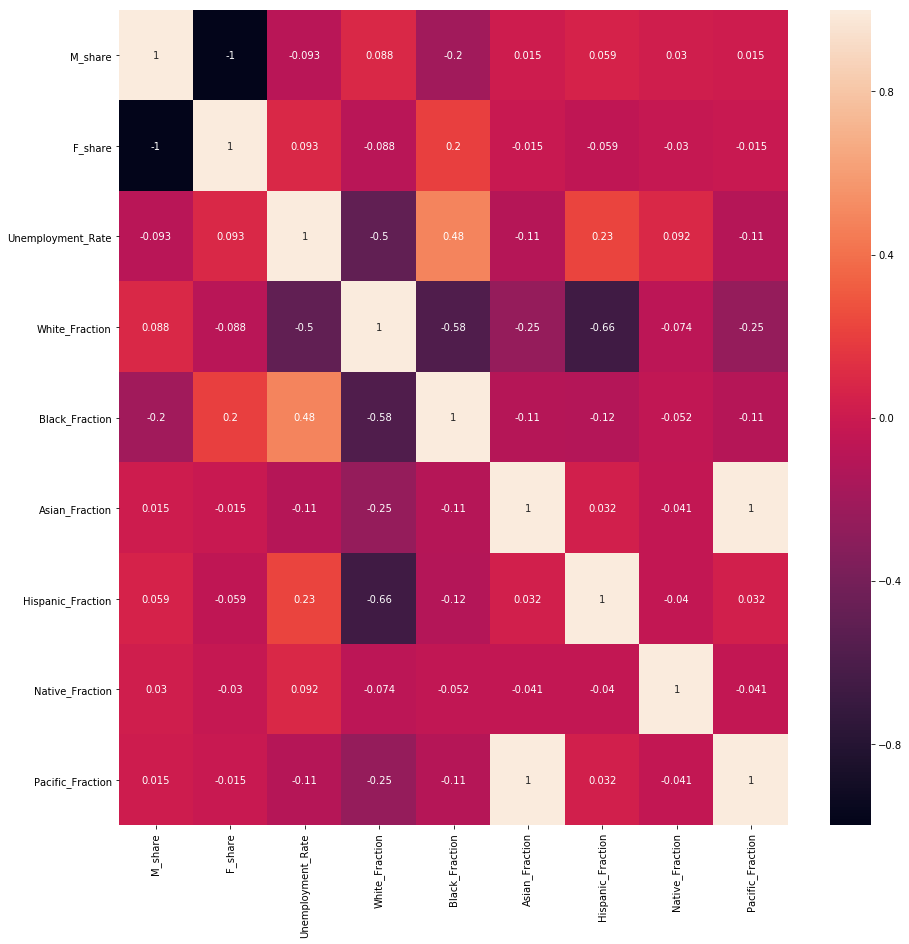

In [0]:
plt.figure(figsize = (15,15))
f=acs2015_census[acs2015_census.columns[37:]].corr()
ax=sns.heatmap(f, annot=True)

Korelasyon analizi sonucunda siyahi olmakla işsizlik arasında pozitif ilişkiye rastlanmıştır. 
Beyaz ırk ile işsizlik arasında ise negatif yönlü bir ilişki mevcuttur. 
Erkek olmakla işsizlik arasında zayıf negatif ilişki mevcutken kadın olmak ile işsizlik arasında zayıf pozitif ilişki mevcuttur. 

# 4 - Veri Kümesinin Görselleştirilmesi

## 4.1 - Irklara göre nufus dağılımı

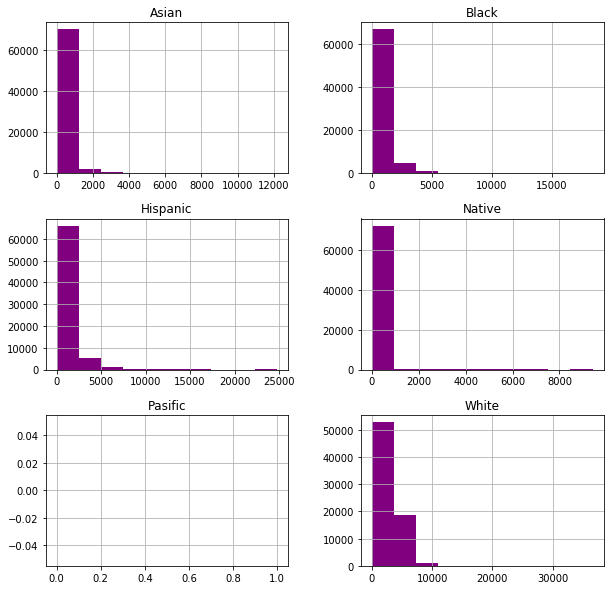

In [0]:
acs2015_census.loc[:,["Asian", "Black", "White", "Hispanic", "Native", "Pasific"] ].hist(color="purple",figsize=(10,10))
plt.show()

## 4.2 - Toplam nüfusa göre 4 büyük şehirde çalışma sektörü dağılımı

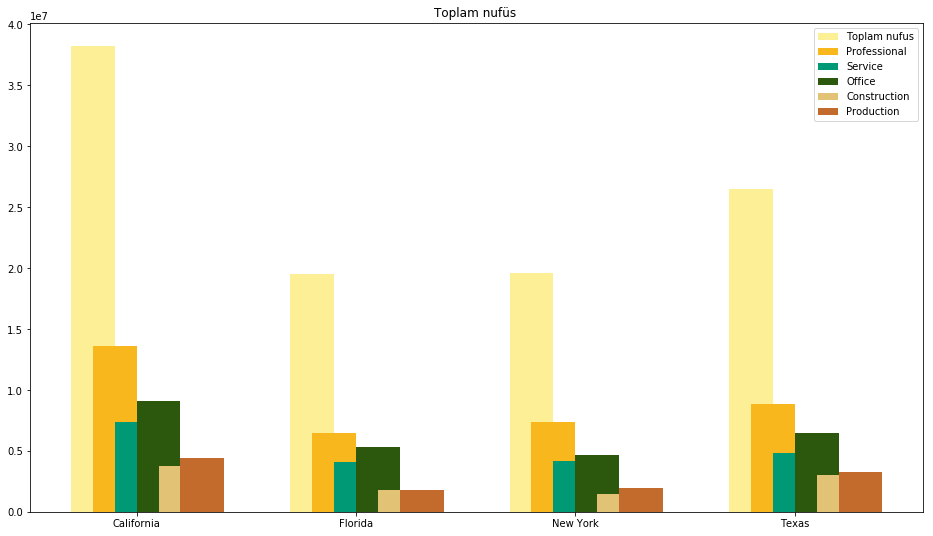

In [0]:
fig_size = [16,9]
plt.figure(figsize = fig_size)
y0 = state_sector.TotalPop
y1 = state_sector.Professional
y2 = state_sector.Service
y3 = state_sector.Office
y4 = state_sector.Construction
y5 = state_sector.Production

x_labels = state_sector.State
x_pos = np.arange(len(y0))

plt.bar(x_pos - 0.2, y0, color = "#fdef96", width = 0.2)
plt.bar(x_pos - 0.1, y1, color = "#f7b71d", width = 0.2)
plt.bar(x_pos + 0.0, y2, color = "#009975", width = 0.2)
plt.bar(x_pos + 0.1, y3, color = "#2b580c", width = 0.2)
plt.bar(x_pos + 0.2, y4, color = "#e2c275", width = 0.2)
plt.bar(x_pos + 0.3, y5, color = "#c36a2d", width = 0.2)
plt.title("Toplam nufüs ")

plt.xticks(x_pos, x_labels)
plt.legend(["Toplam nufus", "Professional", "Service", "Office", "Construction", "Production"])

plt.show()

## 4.3 -  Toplam nüfusa göre 4 büyük şehirde cinsiyet dağılımı

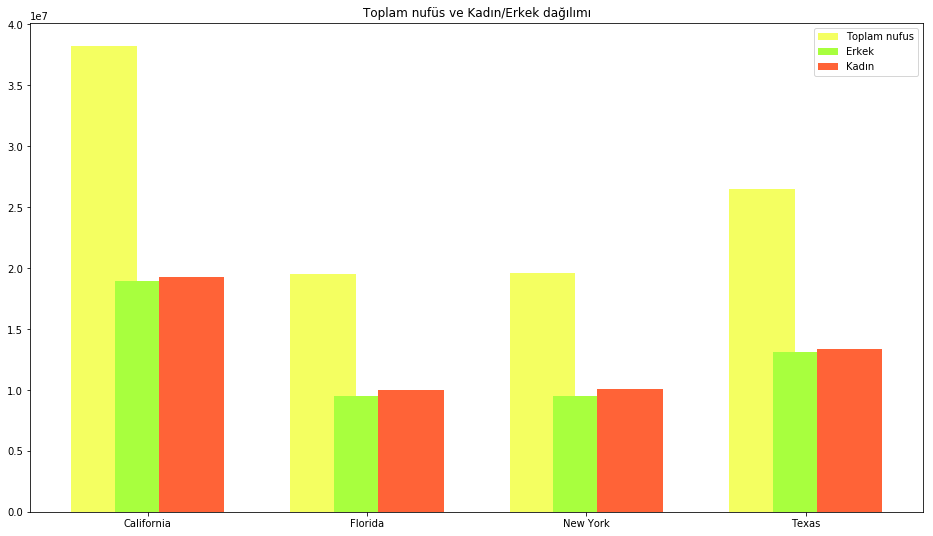

In [0]:
fig_size = [16,9]
plt.figure(figsize = fig_size)
y0 = state_sex.TotalPop
y1 = state_sex.Men
y2 = state_sex.Women

x_labels = state_sex.State
x_pos = np.arange(len(y0))

plt.bar(x_pos-0.2, y0, color = "#f4ff61", width = 0.3)
plt.bar(x_pos+0.0, y1, color = "#a8ff3e", width = 0.3)
plt.bar(x_pos+0.2, y2, color = "#ff6337", width = 0.3)

plt.title("Toplam nufüs ve Kadın/Erkek dağılımı")

plt.xticks(x_pos, x_labels)
plt.legend(["Toplam nufus", "Erkek", "Kadın"])

plt.show()

## 4.4 - Toplam nüfusa göre 4 büyük şehirde ırk dağılımı

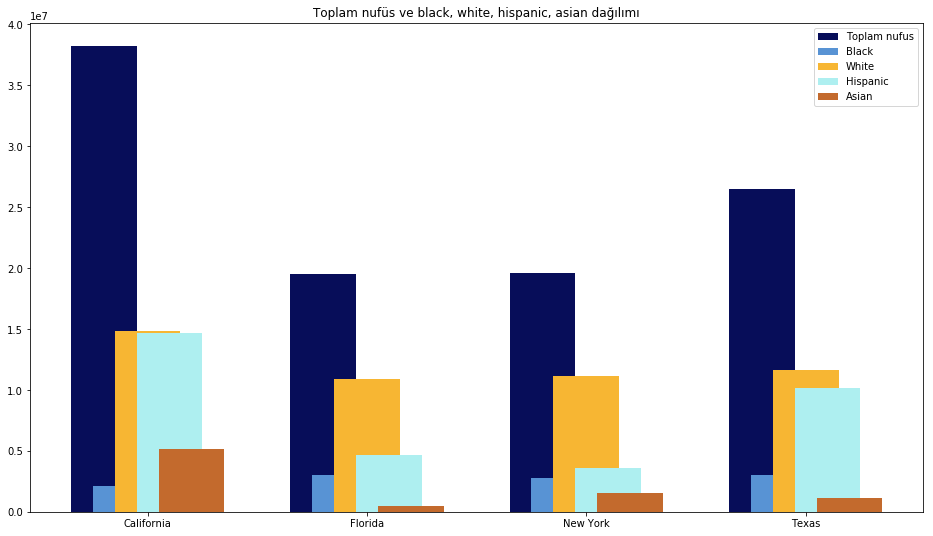

In [0]:
fig_size = [16,9]
plt.figure(figsize = fig_size)
y0 = state_totalpop.TotalPop
y1 = state_totalpop.Black
y2 = state_totalpop.White
y3 = state_totalpop.Hispanic
y4 = state_totalpop.Asian
x_labels = state_totalpop.State
x_pos = np.arange(len(y0))

plt.bar(x_pos - 0.2, y0, color = "#070d59", width = 0.3)
plt.bar(x_pos - 0.1, y1, color = "#5893d4", width = 0.3)
plt.bar(x_pos + 0.0, y2, color = "#f7b633", width = 0.3)
plt.bar(x_pos + 0.1, y3, color = "#aeeff0", width = 0.3)
plt.bar(x_pos + 0.2, y4, color = "#c36a2d", width = 0.3)

plt.title("Toplam nufüs ve black, white, hispanic, asian dağılımı")

plt.xticks(x_pos, x_labels)
plt.legend(["Toplam nufus", "Black", "White", "Hispanic", "Asian"])

plt.show()

## 4.5 - Cinsiyet ve ırka göre gelir dağılımı

In [0]:
sex_list = ["Men", "Women", "Black", "White", "Asian", "Hispanic"]

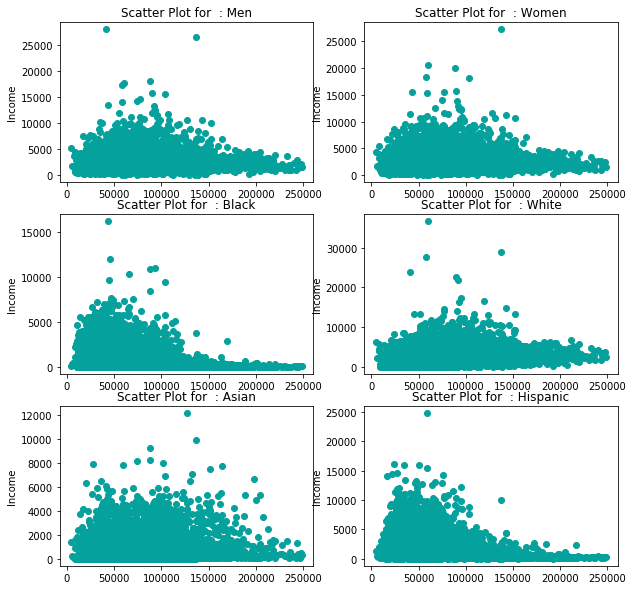

In [0]:
fig = plt.figure(figsize = (10, 10))
i = 0

for i in range(0, len(sex_list)):
    fig.add_subplot(3, 2, i+1)
    plt.title('Scatter Plot for  : {}'.format(sex_list[i]))
    plt.scatter(state_top4.Income, state_top4[sex_list[i]], color = "#05a19c")
    plt.ylabel('Income')

## 4.6 - Sektörlere göre çocuk fakirliği dağılımı

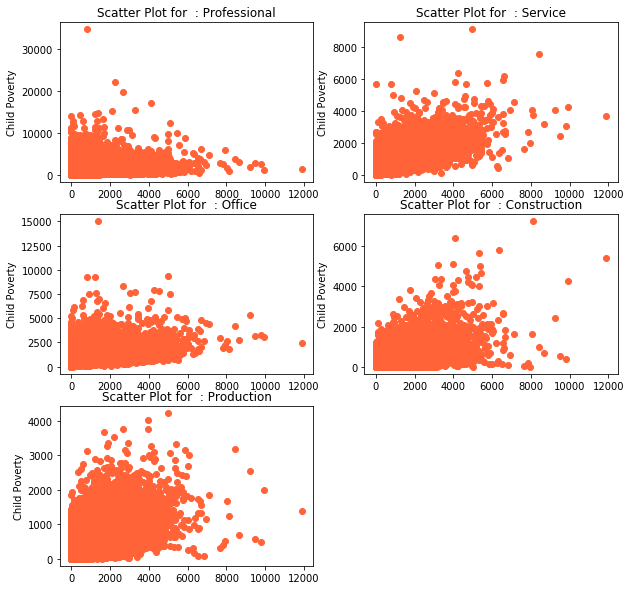

In [0]:
sector_list = ['Professional', 'Service', 'Office', 'Construction', 'Production']

fig = plt.figure(figsize = (10, 10))
i = 0

for i in range(0, len(sector_list)):
    fig.add_subplot(3, 2, i+1)
    plt.title('Scatter Plot for  : {}'.format(sector_list[i]))
    plt.scatter(state_top4.ChildPoverty, state_top4[sector_list[i]], color = "#ff6337")
    plt.ylabel('Child Poverty')

## 4.7 - Çalışma durumuna göre dağılım

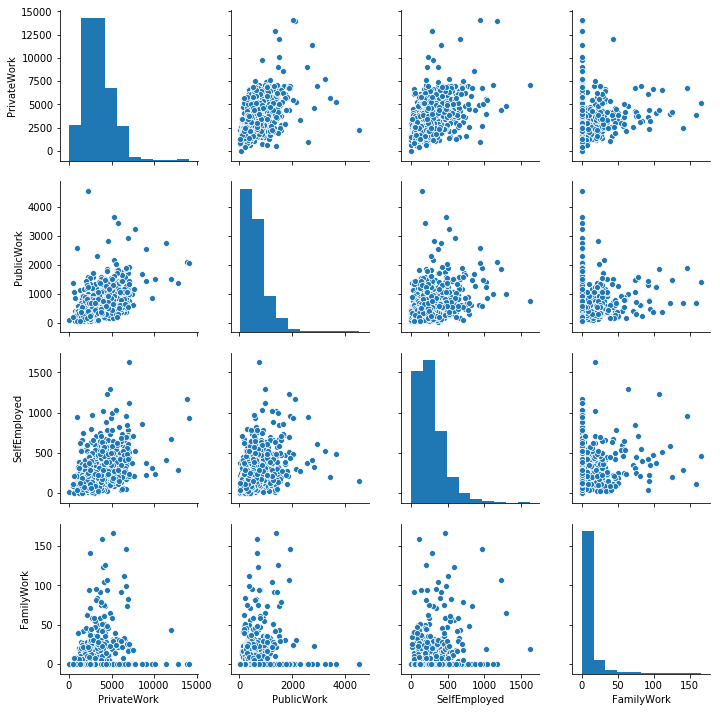

In [0]:
numeric_cols = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

sns.pairplot(acs2015_census[numeric_cols].sample(1000))

## 4.8 - Çalışma/ Çalışmama durumuna göre dağılım 

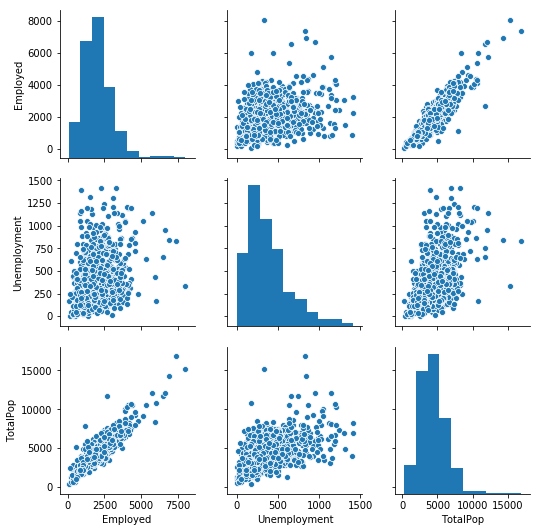

In [0]:
numeric_cols = ['Employed', 'Unemployment', 'TotalPop']

sns.pairplot(acs2015_census[numeric_cols].sample(1000))

# 5- Model Oluşturma

## 5.1 - Model için Ön Hazırlık

Irklara bağlı gelir tahmini yapmak hedeflendiği için hanehalkı geliri olan Income sütunu üzerinde bir dönüştürme işlemi gerçekleştirildi. 

Income <= 32000 ise "Düşük"
Income < 80000 ise "Orta"
Income >= 80000 ise "Yüksek" ataması yapılmıştır. 

In [0]:
acs2015_census['Income'] = acs2015_census['Income'].astype('int')

In [0]:
acs2015_census['high_low_income'] = acs2015_census.Income
acs2015_census.loc[(acs2015_census['Income'] <= 32000), 'high_low_income'] = "Low"
acs2015_census.loc[(acs2015_census['Income'] < 80000) & (acs2015_census['Income'] > 32000), 'high_low_income'] = "Mid"
acs2015_census.loc[(acs2015_census['Income'] >= 80000), 'high_low_income'] = "High"



*   Oluşturulan **high_low_income** değişkeninin içeriğinin incelenmesi



In [59]:
acs2015_census.groupby('high_low_income').size()

high_low_income
High    12812
Low     11277
Mid     48638
dtype: int64

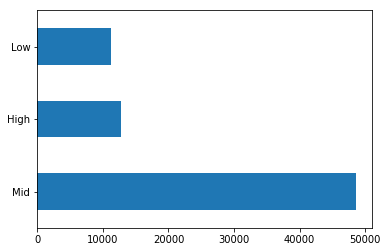

In [68]:
acs2015_census['high_low_income'].value_counts().plot.barh()



*   Oluşturulan yeni değişken sayısallaştırma işleminden geçirilmelidir. Bunun için astype() fonksiyonu uygulanır.




In [0]:
acs2015_census.high_low_income = acs2015_census.high_low_income.astype('category')



*   Irka göre gelir tahmini yapılacağı için X ve y değişkenleri aşağıdaki gibi tanımlanmıştırç 



In [0]:
X = acs2015_census[['White', 'Black', 'Hispanic', 'Native', 'Asian', 'Pacific']]            
Y = acs2015_census['high_low_income']

## 5.2 - Train ve Test setlerinin ayrılması

In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

## 5.3 - Modellerin Kurulması  ve Tahmin- Confusion Matrix

### 5.3.1 Logistic Regresyon

In [78]:
logis = LogisticRegression()
logis.fit(X_train, y_train)
prediction=logis.predict(X_test)
print("logistic regression::\n", confusion_matrix(y_test, prediction), "\n")
print(accuracy_score(y_test, prediction))


logistic regression::
 [[ 211   12 2318]
 [  18  235 1960]
 [ 137  177 9478]] 

0.6822494156469132


### 5.3.2 - KNN 

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
print("KNN ::\n",confusion_matrix(y_test,prediction),"\n")
print(accuracy_score(y_test, prediction))

KNN ::
 [[ 976   50 1515]
 [  68  894 1251]
 [ 915  716 8161]] 

0.6896053897978826


### 5.3.3 - Decision Tree

In [84]:
dTmodel = DecisionTreeClassifier()
dTmodel.fit(X_train, y_train)
prediction = dTmodel.predict(X_test)
print("DecisionTree ::\n", confusion_matrix(y_test, prediction),"\n")
print(accuracy_score(y_test, prediction))

DecisionTree ::
 [[1015  131 1395]
 [ 117  908 1188]
 [1448 1243 7101]] 

0.6203767358724048


### 5.3.4 - Random Forest

In [85]:
rForest = RandomForestClassifier()
rForest.fit(X_train,y_train)
prediction=rForest.predict(X_test)
print("RandomForest ::\n",confusion_matrix(y_test,prediction),"\n")
print(accuracy_score(y_test, prediction))

RandomForest ::
 [[1048   40 1453]
 [  64  954 1195]
 [ 958  658 8176]] 

0.699711260827719


### 5.3.5 - Gradient Boosting

In [87]:
grBoosting = GradientBoostingClassifier()
grBoosting.fit(X_train, y_train)
prediction = grBoosting.predict(X_test)
print("GradientBoosting ::\n", confusion_matrix(y_test, prediction), "\n")
print(accuracy_score(y_test, prediction))

GradientBoosting ::
 [[ 901   16 1624]
 [  37  877 1299]
 [ 557  408 8827]]
0.7290664100096247


### 5.3.6 - XgBoost

In [88]:
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)
prediction=xgboost.predict(X_test)
print("xgboost ::\n",confusion_matrix(y_test,prediction), "\n")
print(accuracy_score(y_test, prediction))

xgboost ::
 [[ 840   15 1686]
 [  36  829 1348]
 [ 484  368 8940]] 

0.7293413996975113


#### 5.3.6.1 XgBoost öznitelikleri önem sıralamasına göre grafiklendirmek


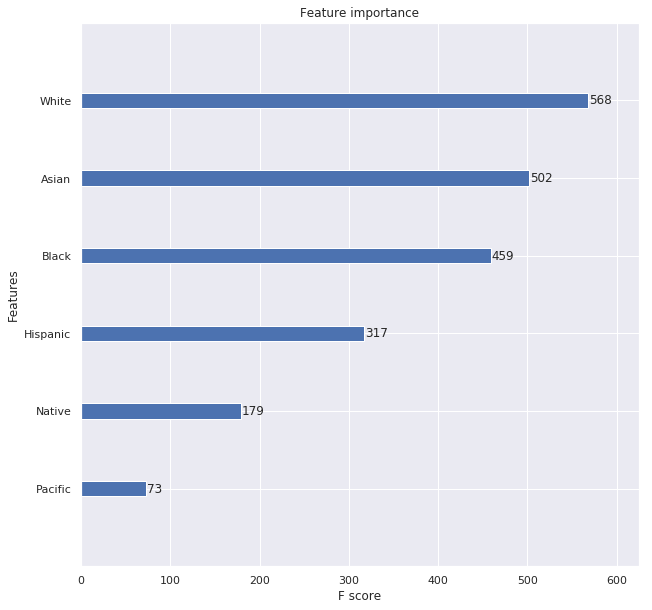

In [118]:
xgb.plot_importance(xgboost)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### 5.3.7 - CatBoost

In [117]:
catB = CatBoostClassifier()
catB.fit(X_train, y_train)
prediction=catB.predict(X_test)
print("catboost ::\n",confusion_matrix(y_test,prediction), "\n")
print(accuracy_score(y_test, prediction))
score8 = accuracy_score(y_test, prediction)

0:	learn: -1.0760050	total: 47ms	remaining: 47s
1:	learn: -1.0544881	total: 92.3ms	remaining: 46s
2:	learn: -1.0350429	total: 137ms	remaining: 45.5s
3:	learn: -1.0162744	total: 191ms	remaining: 47.5s
4:	learn: -0.9987638	total: 240ms	remaining: 47.8s
5:	learn: -0.9818724	total: 299ms	remaining: 49.5s
6:	learn: -0.9662205	total: 348ms	remaining: 49.4s
7:	learn: -0.9516797	total: 398ms	remaining: 49.3s
8:	learn: -0.9377566	total: 449ms	remaining: 49.5s
9:	learn: -0.9245436	total: 505ms	remaining: 50s
10:	learn: -0.9123709	total: 558ms	remaining: 50.2s
11:	learn: -0.9007217	total: 611ms	remaining: 50.3s
12:	learn: -0.8898231	total: 660ms	remaining: 50.1s
13:	learn: -0.8791027	total: 712ms	remaining: 50.2s
14:	learn: -0.8689560	total: 761ms	remaining: 50s
15:	learn: -0.8593941	total: 810ms	remaining: 49.8s
16:	learn: -0.8502457	total: 860ms	remaining: 49.7s
17:	learn: -0.8420436	total: 915ms	remaining: 49.9s
18:	learn: -0.8339573	total: 964ms	remaining: 49.8s
19:	learn: -0.8263675	total: 1

## 5.4 - Modellerin Değerlendirilmesi

### 5.4.1 - Accuracy score değerleri

In [0]:
    
scores = cross_val_score(logis,X_train,y_train,cv=5)
print("Accuracy for logistic regresion: mean: {0:.2f} 2sd: {1:.2f}".format(scores.mean(),scores.std() * 2))
print("Scores::",scores)
print("\n")

scores3 = cross_val_score(knn,X_train,y_train,cv=5)
print("Accuracy for KNN: mean: {0:.2f} 2sd: {1:.2f}".format(scores3.mean(),scores3.std() * 2))
print("Scores::",scores3)
print("\n")

scores4 = cross_val_score(dTmodel,X_train,y_train,cv=5)
print("Accuracy for Decision Tree: mean: {0:.2f} 2sd: {1:.2f}".format(scores4.mean(),scores4.std() * 2))
print("Scores::",scores4)
print("\n")

scores5 = cross_val_score(rForest,X_train,y_train,cv=5)
print("Accuracy for Random Forest: mean: {0:.2f} 2sd: {1:.2f}".format(scores5.mean(),scores5.std() * 2))
print("Scores::",scores5)
print("\n")

scores6 = cross_val_score(grBoosting,X_train,y_train,cv=5)
print("Accuracy for Gradient Boosting: mean: {0:.2f} 2sd: {1:.2f}".format(scores6.mean(),scores6.std() * 2))
print("Scores::",scores6)
print("\n")

scores7 = cross_val_score(xgboost,X_train,y_train,cv=5)
print("Accuracy for xgboost: mean: {0:.2f} 2sd: {1:.2f}".format(scores7.mean(),scores7.std() * 2))
print("Scores::",scores7)
print("\n")



### 5.4.2 - Model Başarısının Sınanması

In [0]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('XGBoost', XGBClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.678091 (0.007067)
LDA: 0.676819 (0.006174)
KNN: 0.686754 (0.003363)
CART: 0.616542 (0.005026)
Random Forest: 0.697926 (0.004549)
Gradient Boosting: 0.732989 (0.005730)
XGBoost: 0.732060 (0.005282)


### 5.4.3 - Model Tahmin Başarısı Değerlendirmesi

### Aşağıdaki örnekte yalnızca randomForest algoritması için parametre belirleme işlemi gerçekleştirilmiştir. Diğer algoritmalar içinde aynı yöntemle parametreler belirlenebilir. 

In [114]:
clf = RandomForestClassifier()
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 4],
              "min_samples_split": [2, 3, 4],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 4}


In [113]:
rForest = RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_depth = None, max_features = 1, min_samples_split = 4)
rForest.fit(X_train,y_train)
prediction=rForest.predict(X_test)
print("RandomForest ::\n",confusion_matrix(y_test,prediction),"\n")
print(accuracy_score(y_test, prediction))

RandomForest ::
 [[ 922   25 1594]
 [  44  863 1306]
 [ 759  535 8498]] 

0.706929740134745


### Yapılan parametre belirleme işlemi sonucunda en iyi parametrelerle model tekrar kurulmuştur ve başarı oranı %71'e yükselmiştir. 



# 6- Sonuçların Görselleştirilmesi

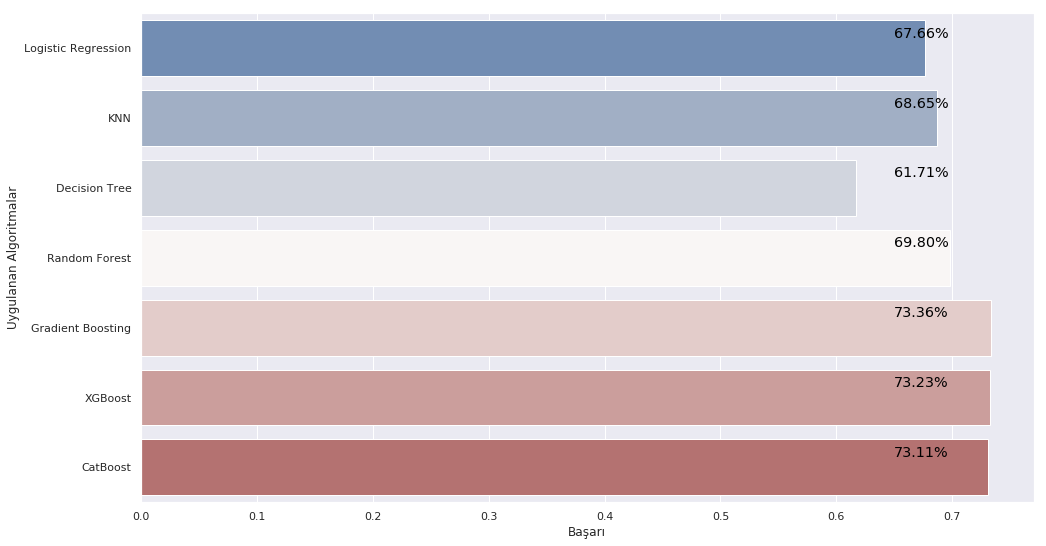

In [108]:
methods = ["Logistic Regression","KNN", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "CatBoost"]
accuracy = [scores.mean(), scores3.mean(), scores4.mean(), scores5.mean(), scores6.mean(), scores7.mean(), score8]

sns.set()
plt.figure(figsize=(16,9))
plt.ylabel("Uygulanan Algoritmalar")
plt.xlabel("Başarı")
sns.barplot(x=accuracy, y=methods, palette="vlag")


for line in range(len(methods)):
     plt.text(0.65, line-0.15, "{:.2f}%".format(accuracy[line]*100), horizontalalignment='left', size='large', color="black")


### Yapılan model değerlendirme işlemleri sonucunda en iyi model %73.36 ile Gradient Boosting olarak belirlenmiştir. 